(1, 150, 150, 3)


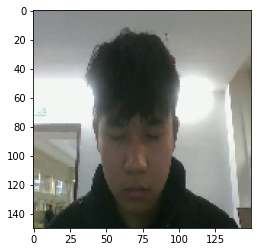

[[0]]


In [9]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



img_path = r'D:\qq\2690486436\FileRecv\train\close\2.jpg'
model = load_model(r'C:\Users\24132\python深度学习\open_and_close_samll_1.h5')
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

print(model.predict_classes(img_tensor))

In [4]:
#TensorFlow and tf.keras
import tensorflow as tf
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from time import time
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#CPU运行
# startTime1 = time()

# with tf.device('/cpu:0'):
#     model = tf.keras.models.Sequential([
#       tf.keras.layers.Flatten(input_shape=(28, 28)),
#       tf.keras.layers.Dense(1000, activation='relu'),
#       tf.keras.layers.Dropout(0.2),
#       tf.keras.layers.Dense(1000, activation='relu'),
#       tf.keras.layers.Dropout(0.2),
#       tf.keras.layers.Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     model.fit(x_train, y_train, epochs=10)
#     model.evaluate(x_test, y_test)

# t1 = time() - startTime1

#GPU运行
startTime2 = time()

with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(1000, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1000, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=10)
    model.evaluate(x_test, y_test)

t2 = time() - startTime2

#打印运行时间
# print('使用cpu花的时间：', t1)
print('使用gpu花的时间：', t2)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1987 - accuracy: 0.9393
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1051 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0826 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9820
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0533 - accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0487 - accuracy: 0.9861
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9871
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9876
Epoch 10/10
313/313 [==============================] - 0s 905us/step - loss: 0.134

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

file = r'D:\onedrive\桌面\QQ图片20210102153206.jpg'
pic = Image.open(file)
print
plt.imshow(pic)
plt.show()

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10786895311841008763
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5303191656229594602
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951408640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18005731447030327444
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4091426105934839113
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import tensorflow as tf # 下面语句都可以达到检测目的
tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')
tf.test.gpu_device_name()

'/device:GPU:0'